# TensorFlow 初步认识

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
x_data = np.float32(np.random.rand(2,100))
y_data = np.dot([0.100,0.200],x_data) + 0.300

In [34]:
#构造一个线性模型
b = tf.Variable(tf.zeros([1]))
w = tf.Variable(tf.random_uniform([1,2],-1.0,1.0))  
y = tf.matmul(w,x_data) + b

In [89]:
#最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))   #姜维,整体的平均值
optimizer = tf.train.GradientDescentOptimizer(0.1)  #梯度下降法优化，优化器
train = optimizer.minimize(loss)

In [90]:
# 初始化变量
init = tf.initialize_all_variables()
#启动图
sess = tf.Session()
sess.run(init)

In [91]:
# 拟合平面
for step in range(0,201):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(w),sess.run(b))

0 [[-0.08568259  0.81504047]] [0.01580389]
20 [[0.01122052 0.66807747]] [0.09219563]
40 [[0.06272936 0.5494419 ]] [0.12997806]
60 [[0.0942588  0.46268633]] [0.16073939]
80 [[0.11264783 0.3988657 ]] [0.18583842]
100 [[0.12251629 0.35161564]] [0.20634605]
120 [[0.12696984 0.316399  ]] [0.22312234]
140 [[0.12807952 0.2899693 ]] [0.23686033]
160 [[0.12721214 0.2699941 ]] [0.24812022]
180 [[0.12525737 0.25479028]] [0.25735593]
200 [[0.12278372 0.24313688]] [0.26493618]


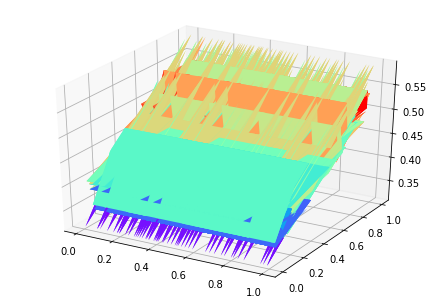

In [92]:
fig = plt.figure()
ax = Axes3D(fig)

x1 = np.array(x_data[0,:])
x2 = np.array(x_data[1,:])

X, Y = np.meshgrid(x1,x2)
Z = 0.09999619 * x1 + 0.19999632 * x2 + 0.30000395
# ax.plot_surface(X,Y,y_data.reshape(-1,1),rstride=1,cstride=1, cmap='rainbow')
ax.plot_surface(X,Y,Z.reshape(-1,1), cmap=plt.cm.rainbow)
plt.show()

# 手写字体识别---基础篇

In [68]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [69]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [70]:
x = tf.placeholder("float",[None,784])  #相当于一个形参
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [22]:
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float",[None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))  #交叉熵计算，

### 模型训练

In [31]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()  #与后端的高效链接
sess.run(init)

In [24]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)  #批量读取数据
    sess.run(train_step,feed_dict={x: batch_xs,y_:batch_ys})

### 模型评价

In [25]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))   #逐个元素对比返回相等的 true

In [10]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float")) #cast将张量转换为不同的dtype并返回它 

In [11]:
sess.run(accuracy,feed_dict={x: mnist.test.images,y_:mnist.test.labels})

0.9079

# 手写字体识别— 进阶篇  --深度卷积神经网络

In [71]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [72]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#one_hot为one_hot编码，即独热码，作用是将状态值编码成状态向量，转化成二进制
#这样使得状态对于计算机来说更加明确，对于矩阵操作也更加高效。

sess = tf.InteractiveSession()  #灵活地构建你的代码.它能让你在运行图的时候,插入一些计算图

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
#占位符
x = tf.placeholder("float",[None,784])
y_ = tf.placeholder("float",[None,10])

# 变量
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
sess.run(tf.initialize_all_variables())

# 类别预测和损失函数用
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))

In [ ]:
#训练模型  TensorFlow 知道整个计算图,它可以使用自动微分法找到对于各个变量的损失的梯度值.
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0],y_: batch[1]})

# 评估模型
correct_predict = tf.equal(tf.arg_max(y,1),tf.arg_max(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict,"float"))
accuracy.eval(feed_dict={x: mnist.test.images,y_: mnist.test.labels})

## 构建多层卷积网络

In [75]:
# 权重初始化
def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev=0.1)  # 撤销的 从截断的正态分布中输出随机值. 
    #生成的值遵循具有指定平均值和标准偏差的正态分布,不同之处在于其平均值大于 2 个标准差的值将被丢弃并重新选择.
    # stddev 截断前正态分布的标准偏差.
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

In [76]:
#卷积和池化
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,1,1,1], strides=[1,2,2,1], padding='SAME')

In [77]:
# 第一层卷积
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [78]:
# 第二层卷积
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [79]:
#密集连接层   卷积取的是局部特征，全连接就是把以前的局部特征重新通过权值矩阵组装成完整的图。因为用到了所有的局部特征，所以叫全连接。
w_fc1 = weight_variable([7 * 7 * 64,1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2,[-1,7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,w_fc1) + b_fc1)

In [80]:
# Droupout  减少过拟合
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)   #保留的比例

In [81]:
# 输出层
w_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)


In [1]:
# 训练和评估模型
cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_predict = tf.equal(tf.arg_max(y_conv,1), tf.arg_max(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict,"float"))
sess.run(tf.initialize_all_variables())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0],y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g" %(i,train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1],keep_prob: 0.5})
    
print("test accuracy %g" %accuracy.eval(feed_dict={
    x: mnist.test.images,y_: mnist.test.labels, keep_prob: 1.0}))

NameError: name 'tf' is not defined

# 前馈神经网络的简单实现

In [4]:
import numpy as np
import sympy

In [25]:
class NeuralNetwork():
    def __init__(self):
        np.random.seed(666)
        self.weights = 2 * np.random.random((3, 1)) - 1
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivate(self,x):
        return x * (1 -x)
    
    def train(self, traing_inputs, traing_outputs,n_iters):
        for n_iter in range(n_iters):
            output = self.think(traing_inputs)
            error = traing_outputs - output
            sdjustments = np.dot(traing_inputs.T, error * self.sigmoid_derivate(output))
            self.weights += sdjustments
            
    def think(self, inputs):
        inputs = inputs.astype('float')
        output = self.sigmoid(np.dot(inputs,self.weights))
        return output
            
if __name__ == "__main__":
    network = NeuralNetwork()
    print("Beginning Randomly Generated Weights: ")
    print(network.weights)
    
    training_inputs = np.array([[0,0,1],
                              [1,1,1],
                              [1,0,1],
                              [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T
    network.train(training_inputs,training_outputs,10000)
    
    print("Ending Weights After Training: ")
    print(network.weights)
    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Wow, we did it!") 

Beginning Randomly Generated Weights: 
[[0.40087424]
 [0.68837329]
 [0.35302867]]
Ending Weights After Training: 
[[ 9.67286675]
 [-0.20814627]
 [-4.62939287]]
User Input One: 0
User Input Two: 0
User Input Three: 1
Considering New Situation:  0 0 1
New Output data: 
[0.00966633]
Wow, we did it!
